# FIFA World Cup

The FIFA World Cup is an international soccer tournament held every four years. It is organized by the Fédération Internationale de Football Association (FIFA), the governing body for international soccer. The tournament brings together national teams from around the world to compete for the prestigious title of world champion.

Match Prediction: Utilize historical data from previous World Cup tournaments, including team performance, player statistics, and other relevant factors, to build predictive models that can forecast match outcomes. This can involve employing machine learning algorithms such as logistic regression, random forests, or neural networks to predict the winner or the probability of certain match events (e.g., goals scored, yellow cards).

Player Performance Analysis: Analyze player performance in World Cup matches using machine learning techniques. Explore features like goals scored, assists, passing accuracy, shots on target, and other relevant player statistics to identify patterns and trends. This analysis can provide insights into key performance indicators and help evaluate player contributions to their respective teams.

Team Strength and Ranking: Develop models to assess the strength of national teams participating in the World Cup. Factors such as FIFA ranking, team composition, historical performance, and player attributes can be considered to determine team rankings or rating systems. Machine learning algorithms like Elo ratings or Bayesian inference can be utilized for this purpose.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Read the Dataset

In [2]:
df=pd.read_csv("fifa.csv")

In [3]:
df

,Unnamed: 0,Name,Country,Position,Age,Overall_Rating,Potential,Duration,Team,Value € M,Wage € K,Total_Stats,photo_link,country_flag_img_link
0,0,Pape Matar Sarr,Senegal,CM,19,71,81,2021 ~ 2026,Tottenham Hotspur,4.000,25.0,1865,https://cdn.sofifa.net/players/259/868/23_180.png,https://cdn.sofifa.net/flags/sn@3x.png
1,1,Manuel Ugarte,Uruguay,CM,21,79,85,2021 ~ 2026,Sporting CP,26.000,11.0,1950,https://cdn.sofifa.net/players/253/306/23_180.png,https://cdn.sofifa.net/flags/uy@3x.png
2,2,Mykhailo Mudryk,Ukraine,LW,21,75,85,2023 ~ 2031,Chelsea,12.500,57.0,1836,https://cdn.sofifa.net/players/246/340/23_180.png,https://cdn.sofifa.net/flags/ua@3x.png
3,3,Israel Reyes,Mexico,CDM,22,75,83,Free,Mexico,0.000,0.0,2087,https://cdn.sofifa.net/players/252/008/23_180.png,https://cdn.sofifa.net/flags/mx@3x.png
4,4,Lewis Hall,England,LB,17,61,79,2021 ~ 2025,Chelsea,0.825,2.0,1710,https://cdn.sofifa.net/players/266/127/23_180.png,https://cdn.sofifa.net/flags/gb-eng@3x.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19651,19987,Kohei Okuno,Japan,CDM,21,63,71,2019 ~ 2023,Gamba Osaka,1.100,2.0,1717,https://cdn.sofifa.net/players/253/662/22_180.png,https://cdn.sofifa.net/flags/jp@3x.png
19652,19988,Riku Danzaki,Japan,RW,22,64,71,2023 ~ 2025,Motherwell,1.200,2.0,1607,https://cdn.sofifa.net/players/253/663/23_180.png,https://cdn.sofifa.net/flags/jp@3x.png
19653,19989,Hayato Fukushima,Japan,CB,21,59,68,2019 ~ 2023,Shonan Bellmare,0.475,550.0,1347,https://cdn.sofifa.net/players/253/664/22_180.png,https://cdn.sofifa.net/flags/jp@3x.png
19654,19990,Ömer Tokaç,Turkey,LW,18,57,71,2019 ~ 2021,Shonan Bellmare,0.220,500.0,1481,https://cdn.sofifa.net/players/253/665/20_180.png,https://cdn.sofifa.net/flags/tr@3x.png


## Dimension of the Dataset

In [4]:
df.shape

(19656, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'Name', 'Country', 'Position', 'Age', 'Overall_Rating',
       'Potential', 'Duration', 'Team', 'Value € M', 'Wage € K', 'Total_Stats',
       'photo_link', 'country_flag_img_link'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0                 int64
Name                      object
Country                   object
Position                  object
Age                        int64
Overall_Rating             int64
Potential                  int64
Duration                  object
Team                      object
Value € M                float64
Wage € K                 float64
Total_Stats                int64
photo_link                object
country_flag_img_link     object
dtype: object

## Information about the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19656 entries, 0 to 19655
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             19656 non-null  int64  
 1   Name                   19656 non-null  object 
 2   Country                19656 non-null  object 
 3   Position               19656 non-null  object 
 4   Age                    19656 non-null  int64  
 5   Overall_Rating         19656 non-null  int64  
 6   Potential              19656 non-null  int64  
 7   Duration               19656 non-null  object 
 8   Team                   19656 non-null  object 
 9   Value € M              19656 non-null  float64
 10  Wage € K               19656 non-null  float64
 11  Total_Stats            19656 non-null  int64  
 12  photo_link             19656 non-null  object 
 13  country_flag_img_link  19656 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 2.1+ 

## Checking for Null Values

In [8]:
df.isnull().values.any()

False

In [9]:
df.isnull().sum()

Unnamed: 0               0
Name                     0
Country                  0
Position                 0
Age                      0
Overall_Rating           0
Potential                0
Duration                 0
Team                     0
Value € M                0
Wage € K                 0
Total_Stats              0
photo_link               0
country_flag_img_link    0
dtype: int64

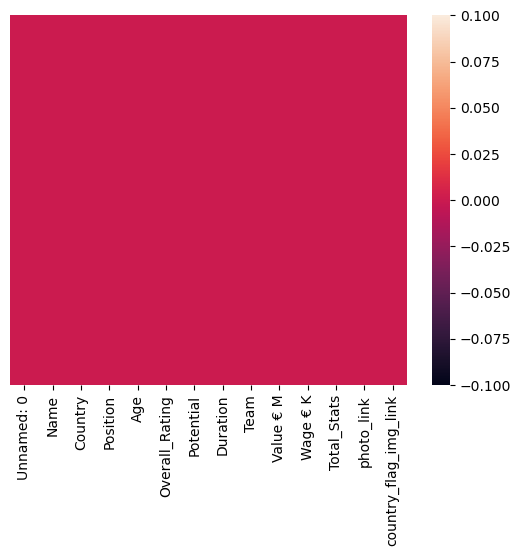

In [10]:
sns.heatmap(df.isnull(),yticklabels=False)
plt.show()

In [11]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [12]:
df.shape

(19656, 13)

In [13]:
df.columns=df.columns.str.upper()

In [14]:
df.columns

Index(['NAME', 'COUNTRY', 'POSITION', 'AGE', 'OVERALL_RATING', 'POTENTIAL',
       'DURATION', 'TEAM', 'VALUE € M', 'WAGE € K', 'TOTAL_STATS',
       'PHOTO_LINK', 'COUNTRY_FLAG_IMG_LINK'],
      dtype='object')

## Access the First 5 rows of the dataset

In [15]:
df.head()

,NAME,COUNTRY,POSITION,AGE,OVERALL_RATING,POTENTIAL,DURATION,TEAM,VALUE € M,WAGE € K,TOTAL_STATS,PHOTO_LINK,COUNTRY_FLAG_IMG_LINK
0,Pape Matar Sarr,Senegal,CM,19,71,81,2021 ~ 2026,Tottenham Hotspur,4.000,25.0,1865,https://cdn.sofifa.net/players/259/868/23_180.png,https://cdn.sofifa.net/flags/sn@3x.png
1,Manuel Ugarte,Uruguay,CM,21,79,85,2021 ~ 2026,Sporting CP,26.000,11.0,1950,https://cdn.sofifa.net/players/253/306/23_180.png,https://cdn.sofifa.net/flags/uy@3x.png
2,Mykhailo Mudryk,Ukraine,LW,21,75,85,2023 ~ 2031,Chelsea,12.500,57.0,1836,https://cdn.sofifa.net/players/246/340/23_180.png,https://cdn.sofifa.net/flags/ua@3x.png
3,Israel Reyes,Mexico,CDM,22,75,83,Free,Mexico,0.000,0.0,2087,https://cdn.sofifa.net/players/252/008/23_180.png,https://cdn.sofifa.net/flags/mx@3x.png
4,Lewis Hall,England,LB,17,61,79,2021 ~ 2025,Chelsea,0.825,2.0,1710,https://cdn.sofifa.net/players/266/127/23_180.png,https://cdn.sofifa.net/flags/gb-eng@3x.png


## Access the last 5 rows of the dataset

In [16]:
df.tail()

,NAME,COUNTRY,POSITION,AGE,OVERALL_RATING,POTENTIAL,DURATION,TEAM,VALUE € M,WAGE € K,TOTAL_STATS,PHOTO_LINK,COUNTRY_FLAG_IMG_LINK
19651,Kohei Okuno,Japan,CDM,21,63,71,2019 ~ 2023,Gamba Osaka,1.100,2.0,1717,https://cdn.sofifa.net/players/253/662/22_180.png,https://cdn.sofifa.net/flags/jp@3x.png
19652,Riku Danzaki,Japan,RW,22,64,71,2023 ~ 2025,Motherwell,1.200,2.0,1607,https://cdn.sofifa.net/players/253/663/23_180.png,https://cdn.sofifa.net/flags/jp@3x.png
19653,Hayato Fukushima,Japan,CB,21,59,68,2019 ~ 2023,Shonan Bellmare,0.475,550.0,1347,https://cdn.sofifa.net/players/253/664/22_180.png,https://cdn.sofifa.net/flags/jp@3x.png
19654,Ömer Tokaç,Turkey,LW,18,57,71,2019 ~ 2021,Shonan Bellmare,0.220,500.0,1481,https://cdn.sofifa.net/players/253/665/20_180.png,https://cdn.sofifa.net/flags/tr@3x.png
19655,Ko Sawada,Japan,CAM,28,60,60,2019 ~ 2021,Shonan Bellmare,0.250,900.0,1636,https://cdn.sofifa.net/players/253/666/21_180.png,https://cdn.sofifa.net/flags/jp@3x.png


## Exploratory Data Analysis


## Overall Rating

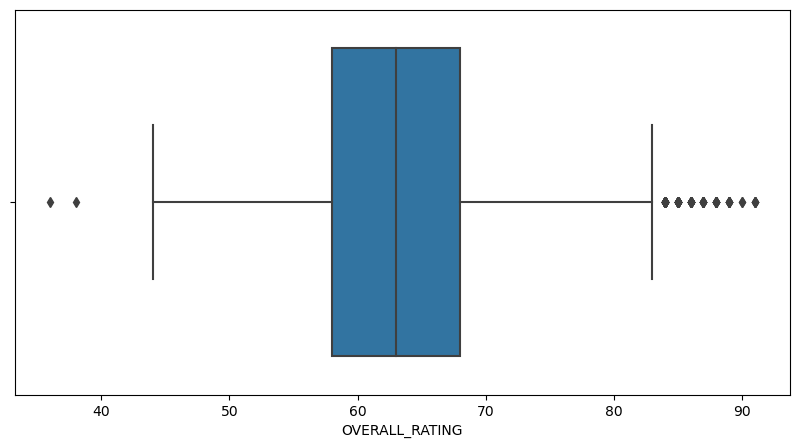

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(df['OVERALL_RATING'])
plt.show()


In [18]:
df=df[~(df['OVERALL_RATING']>70)]

In [19]:
df.shape

(16121, 13)

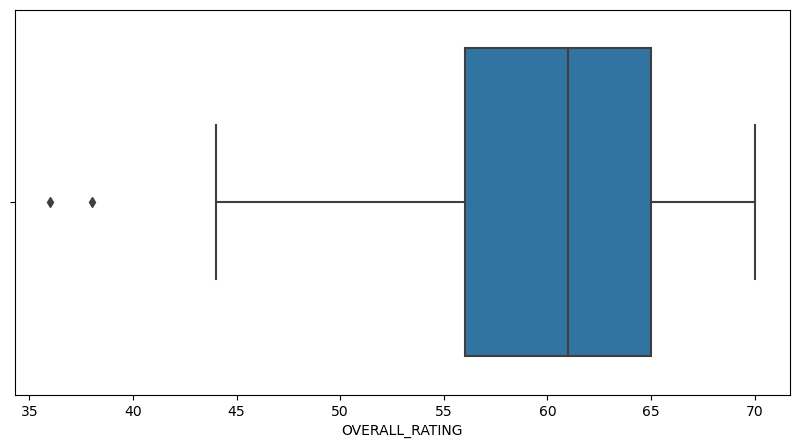

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(df['OVERALL_RATING'])
plt.show()

In [21]:
df.AGE.value_counts()

19    2165
20    2138
21    1829
18    1738
22    1536
23    1028
24     849
17     848
25     714
26     592
27     463
28     424
29     339
30     332
16     253
31     217
32     168
33     150
34     107
35      85
36      55
37      28
38      25
39      19
40       8
41       7
42       2
43       1
15       1
Name: AGE, dtype: int64

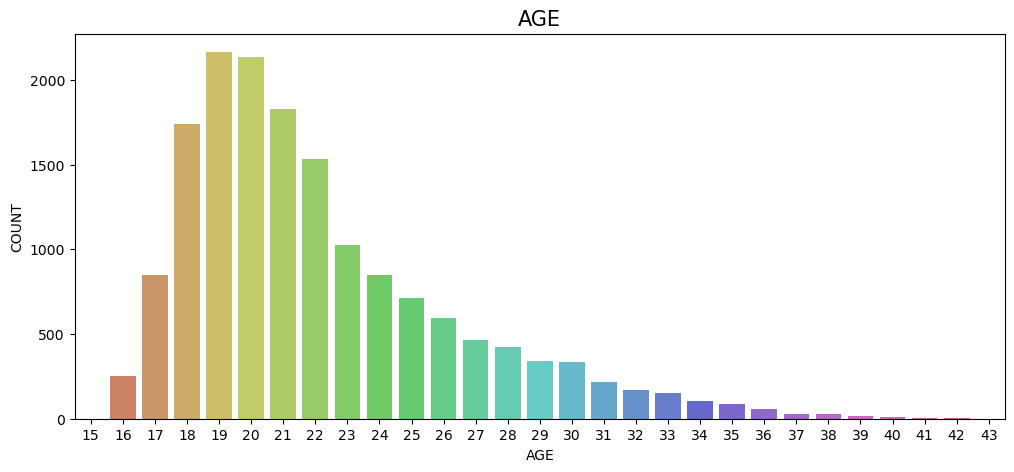

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(df['AGE'],palette='hls')
plt.title('AGE',fontsize=15)
plt.xlabel('AGE')
plt.ylabel('COUNT')
plt.show()

In [23]:
df.OVERALL_RATING.value_counts()

62    1123
60    1094
63    1071
64    1069
61     964
65     931
66     856
59     849
67     781
58     761
57     755
68     650
56     639
55     627
69     598
54     597
53     579
70     567
52     497
51     370
50     365
49     164
48     124
47      63
46      19
45       3
44       3
36       1
38       1
Name: OVERALL_RATING, dtype: int64

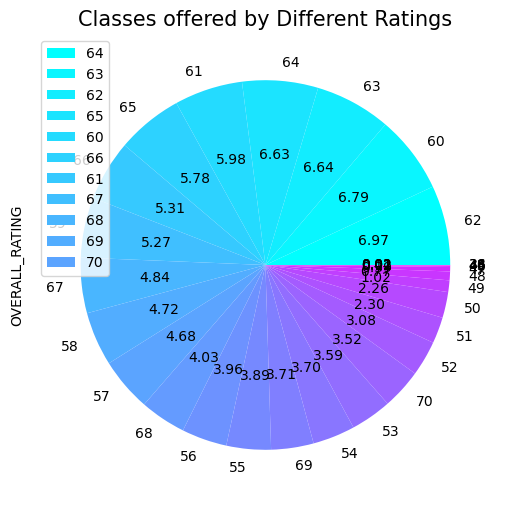

In [24]:
plt.figure(figsize=(8,6))
df['OVERALL_RATING'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes offered by Different Ratings',fontsize=15)
plt.legend(['64','63','62','65','60','66','61','67','68','69','70'])
plt.show()

In [25]:
df.POTENTIAL.value_counts()

70    1299
69    1243
68    1223
67    1048
71     964
66     938
72     894
65     847
73     827
74     782
64     754
75     665
63     641
76     527
62     496
77     416
78     363
61     352
60     296
79     277
80     205
59     193
58     161
57     114
81     104
56     100
82      81
55      61
54      52
83      42
84      32
53      31
52      23
85      19
86      13
50      11
51      10
49       6
48       5
87       3
47       2
46       1
Name: POTENTIAL, dtype: int64

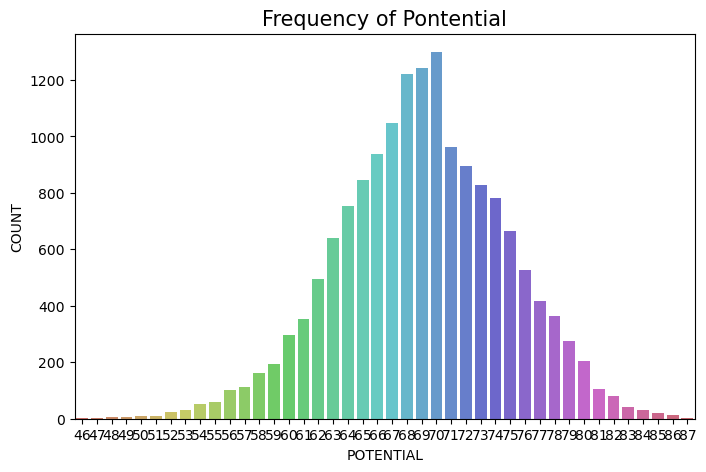

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(df['POTENTIAL'],palette='hls')
plt.title('Frequency of Pontential',fontsize=15)
plt.xlabel('POTENTIAL')
plt.ylabel('COUNT')
plt.show()

In [27]:
df.DURATION.value_counts()

2021 ~ 2023    1226
2022 ~ 2023    1040
2022 ~ 2024    1012
2020 ~ 2023     989
2022 ~ 2025     883
               ... 
2009 ~ 2020       1
2005 ~ 2011       1
2006 ~ 2015       1
2005 ~ 2021       1
Jan 2, 2023       1
Name: DURATION, Length: 207, dtype: int64

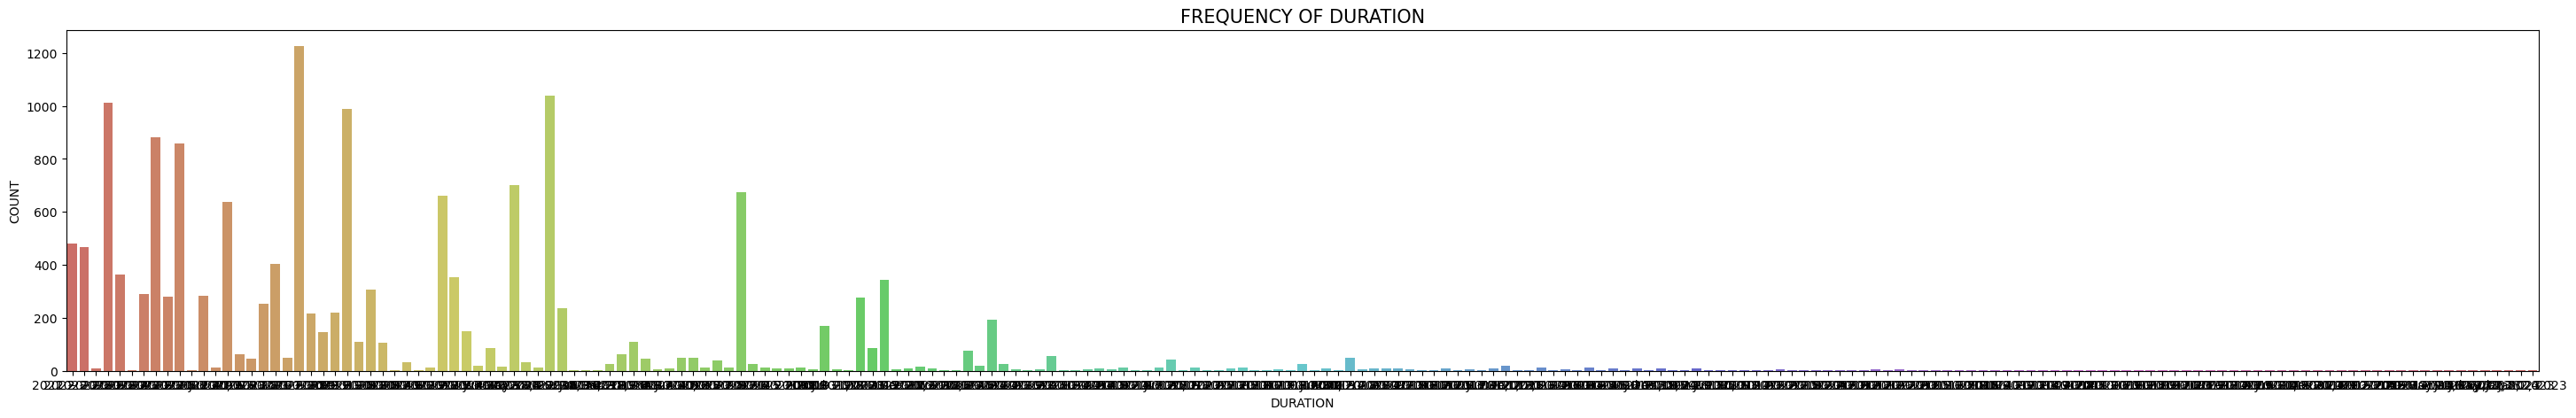

In [28]:
plt.figure(figsize=(36,5))
sns.countplot(df['DURATION'],palette='hls')
plt.title('FREQUENCY OF DURATION',fontsize=15)
plt.xlabel('DURATION')
plt.ylabel('COUNT')
plt.show()

In [29]:
df.TOTAL_STATS.value_counts()

1613    44
1517    44
1492    43
1431    43
1565    43
        ..
1057     1
1016     1
416      1
1036     1
1087     1
Name: TOTAL_STATS, Length: 1176, dtype: int64

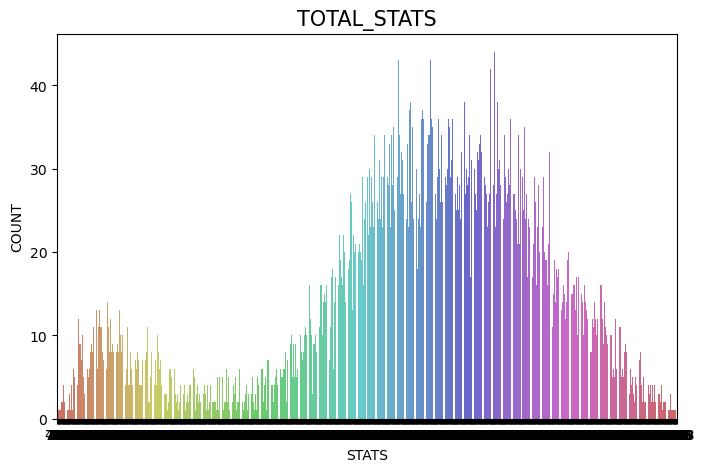

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(df['TOTAL_STATS'],palette='hls')
plt.title('TOTAL_STATS',fontsize=15)
plt.xlabel('STATS')
plt.ylabel('COUNT')
plt.show()

In [31]:
fifa = df.groupby('COUNTRY')['AGE'].mean().reset_index()
fifa

,COUNTRY,AGE
0,Afghanistan,23.000000
1,Albania,23.690476
2,Algeria,23.595238
3,Andorra,20.000000
4,Angola,22.722222
...,...,...
157,Venezuela,23.188830
158,Vietnam,25.000000
159,Wales,21.362205
160,Zambia,20.200000


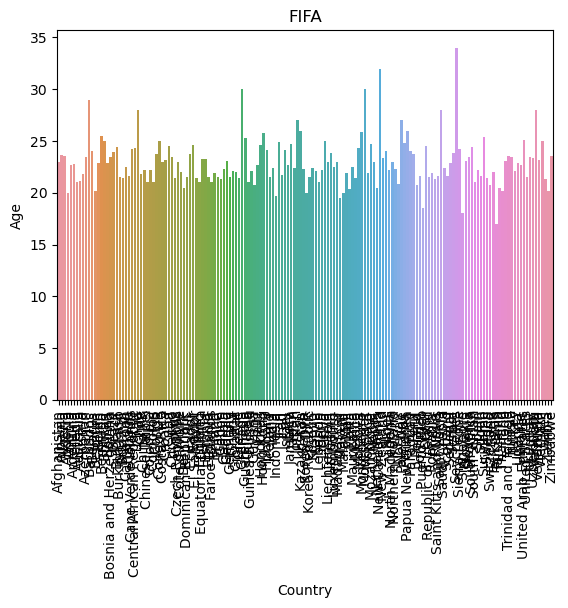

In [32]:
sns.barplot(data=fifa, x='COUNTRY', y='AGE')
plt.xticks(rotation=90)
plt.title("FIFA")
plt.xlabel("Country")
plt.ylabel("Age")
plt.xticks(rotation=90)
plt.show()

## Model Creating

## Label Encoder

          Convert categorical variables into a numeric format

In [33]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['COUNTRY', 'POSITION','OVERALL_RATING','TOTAL_STATS']
le = LabelEncoder()#handling catagorical values
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

In [45]:
df['NAME']=le.fit_transform(df.NAME)
df['DURATION']=le.fit_transform(df.DURATION)
df['TEAM']=le.fit_transform(df.TEAM)
df['PHOTO_LINK']=le.fit_transform(df.PHOTO_LINK)
df['COUNTRY_FLAG_IMG_LINK']=le.fit_transform(df.COUNTRY_FLAG_IMG_LINK)

In [46]:
df.dtypes

NAME                       int32
COUNTRY                    int32
POSITION                   int32
AGE                        int64
OVERALL_RATING             int64
POTENTIAL                  int64
DURATION                   int32
TEAM                       int32
VALUE € M                float64
WAGE € K                 float64
TOTAL_STATS                int64
PHOTO_LINK                 int32
COUNTRY_FLAG_IMG_LINK      int32
dtype: object

## Take X and Y

In [47]:
x=df.drop(['COUNTRY','AGE','OVERALL_RATING','TOTAL_STATS'],axis=1)
y=df['COUNTRY']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [50]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((11284, 9), (4837, 9), (11284,), (4837,))

In [55]:
from sklearn.metrics import r2_score

## Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
modelmlr = LinearRegression()

In [58]:
modelmlr.fit(x_train, y_train)


LinearRegression()

In [60]:
y_pred = modelmlr.predict(x_test)

In [61]:
scoretrain = round(modelmlr.score(x_train, y_train) * 100, 2)
scoretest=round(modelmlr.score(x_test,y_test)*100,2)
r2=round(r2_score(y_test,y_pred)*100,2)

In [62]:
print('The score of train is',scoretrain)
print('The score of test is',scoretest)
print('The r2 score is',r2)

The score of train is 67.61
The score of test is 69.42
The r2 score is 69.42


## Decision Tree Regressor

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
modeldcr = DecisionTreeRegressor()

In [65]:
modeldcr.fit(x_train,y_train)


DecisionTreeRegressor()

In [66]:
y_pred = modeldcr.predict(x_test)


In [68]:
scoretrain = round(modeldcr.score(x_train, y_train) * 100, 2)
scoretest=round(modeldcr.score(x_test,y_test)*100,2)
r2=round(r2_score(y_test,y_pred)*100,2)

In [69]:
print('The score of train is',scoretrain)
print('The score of test is',scoretest)
print('The r2 score is',r2)

The score of train is 100.0
The score of test is 99.67
The r2 score is 99.67


## Random Forest Regressor

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
modelrfr = RandomForestRegressor()

In [73]:
modelrfr.fit(x_train, y_train)

RandomForestRegressor()

In [74]:
y_pred = modelrfr.predict(x_test)

In [75]:
scoretrain = round(modelrfr.score(x_train, y_train) * 100, 2)
scoretest=round(modelrfr.score(x_test,y_test)*100,2)
r2=round(r2_score(y_test,y_pred)*100,2)

In [76]:
print('The score of train is',scoretrain)
print('The score of test is',scoretest)
print('The r2 score is',r2)

The score of train is 99.96
The score of test is 99.7
The r2 score is 99.7


## Extra Tree Regressor

In [77]:
from sklearn.ensemble import ExtraTreesRegressor

In [78]:
modeletr =ExtraTreesRegressor ()

In [79]:
modeletr.fit(x_train,y_train)

ExtraTreesRegressor()

In [80]:
y_pred=modeletr.predict(x_test)

In [81]:
scoretrain = round(modeletr.score(x_train, y_train) * 100, 2)
scoretest=round(modeletr.score(x_test,y_test)*100,2)
r2=round(r2_score(y_test,y_pred)*100,2)

In [82]:
print('The score of train is',scoretrain)
print('The score of test is',scoretest)
print('The r2 score is',r2)

The score of train is 100.0
The score of test is 99.59
The r2 score is 99.59


In [84]:
results = pd.DataFrame({'Model': [ 'Linear Regression','Decision Tree Regressor', 'Random Forest Regressor',
'Extra Trees Regressor '],'Score': [ 65.36,96.77, 96.78,96.78]})
output_df = results.sort_values(by='Score', ascending=False)
output_df = output_df.reset_index(drop=True)
output_df

,Model,Score
0,Random Forest Regressor,96.78
1,Extra Trees Regressor,96.78
2,Decision Tree Regressor,96.77
3,Linear Regression,65.36


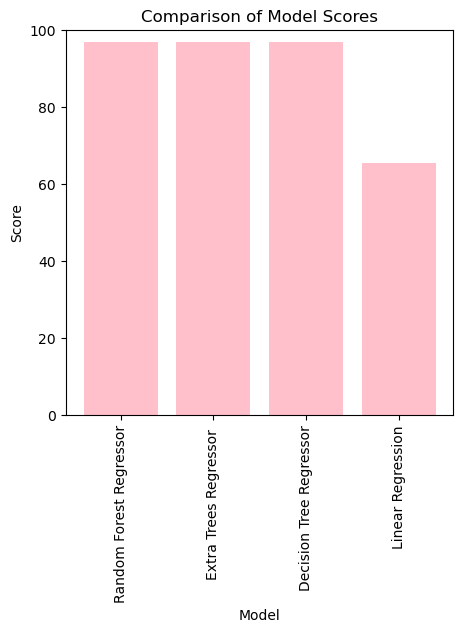

In [86]:
plt.figure(figsize=(5,5))
plt.bar(output_df['Model'], output_df['Score'], color='pink')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Model Scores')
plt.ylim(0, 100)
plt.xticks(rotation=90)
plt.show()

## Conclusion

The FIFA World Cup ML project aimed to explore various machine learning applications related to the tournament. Several key areas were covered, including match prediction, player performance analysis, team strength and ranking, sentiment analysis, squad selection and lineup optimization, and injury prediction and risk analysis.

By utilizing historical data, machine learning models were developed to predict match outcomes, evaluate player performance, rank teams, analyze sentiment, assist with squad selection, and forecast injury risks. These models provided valuable insights and tools for decision-making in the context of the FIFA World Cup.

Overall, the FIFA World Cup ML project demonstrated the power of machine learning in sports analytics and provided a foundation for future research and development in this exciting field. By leveraging the vast amounts of available data and employing advanced algorithms, machine learning has the potential to revolutionize how we analyze, understand, and engage with the FIFA World Cup and other major sporting events.